In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [2]:
data=pd.read_csv('happydata.csv')

In [3]:
data.columns

Index(['infoavail', 'housecost', 'schoolquality', 'policetrust',
       'streetquality', 'ëvents', 'happy'],
      dtype='object')

In [4]:
data['events']=data['ëvents']
data.drop('ëvents',inplace=True,axis=1)
data

,infoavail,housecost,schoolquality,policetrust,streetquality,happy,events
0,3,3,3,4,2,0,4
1,3,2,3,5,4,0,3
2,5,3,3,3,3,1,5
3,5,4,3,3,3,0,5
4,5,4,3,3,3,0,5
...,...,...,...,...,...,...,...
138,5,3,3,1,3,0,5
139,5,2,3,4,2,1,5
140,5,3,3,4,4,1,5
141,4,3,3,4,4,0,5


In [5]:
data.dropna(axis=0,inplace=True)

               infoavail  housecost  schoolquality  policetrust  \
infoavail       1.000000   0.092676       0.301971     0.104378   
housecost       0.092676   1.000000       0.181081     0.107432   
schoolquality   0.301971   0.181081       1.000000     0.298898   
policetrust     0.104378   0.107432       0.298898     1.000000   
streetquality   0.399203  -0.002141       0.329874     0.269420   
happy           0.312740   0.019368       0.163639     0.113356   
events          0.417521   0.024546       0.207006     0.199151   

               streetquality     happy    events  
infoavail           0.399203  0.312740  0.417521  
housecost          -0.002141  0.019368  0.024546  
schoolquality       0.329874  0.163639  0.207006  
policetrust         0.269420  0.113356  0.199151  
streetquality       1.000000  0.206685  0.307402  
happy               0.206685  1.000000  0.220729  
events              0.307402  0.220729  1.000000  


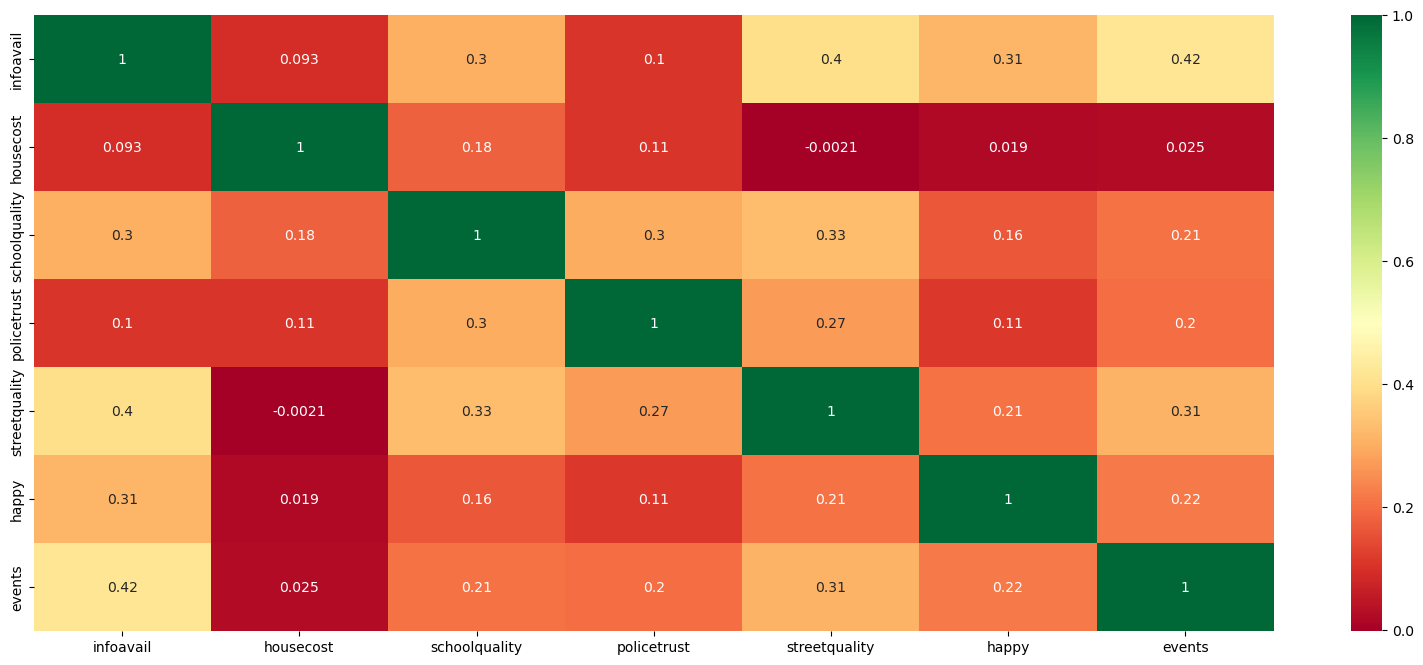

In [6]:
corre=pd.DataFrame(data=data.corr())
print(corre)
plt.figure(figsize=(20,8))
sns.heatmap(corre,annot=True,cmap='RdYlGn')
plt.show()

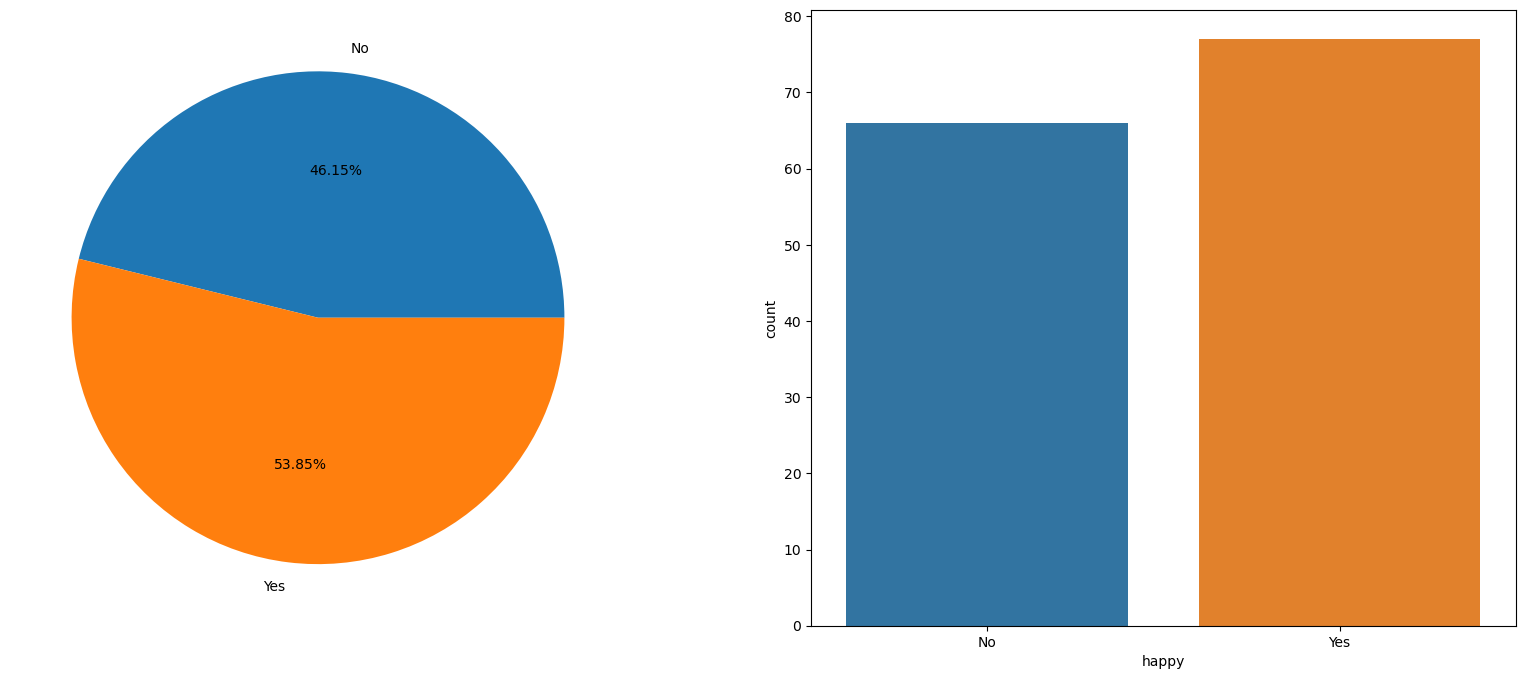

In [7]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
data['happy']=data['happy'].replace({0:'No',1:'Yes'})
df=data.groupby('happy')['happy'].count().reset_index(name='Counts')
ax[0].pie(df['Counts'].tolist(),labels=df['happy'].tolist(),autopct="%.2f%%")
sns.countplot(data=data,x='happy',ax=ax[1])
plt.show()

In [ ]:
df_train,df_test=train_test_split(data,train_size=0.8,test_size=0.2,random_state=100)
y_train=df_train.pop('happy')
x_train=df_train
y_test=df_test.pop('happy')
x_test=df_test
rfc=RandomForestClassifier(bootstrap=True)
p={'criterion':['gini','entropy'],
'n_estimators':range(2,60,2),
'max_depth':range(4,15),
'min_samples_split':range(2,40,3)
  }
classifier=GridSearchCV(rfc,p,cv=3,scoring='accuracy',return_train_score=True,verbose=3)
classifier.fit(x_train,y_train)

Fitting 3 folds for each of 8294 candidates, totalling 24882 fits
[CV 1/3] END criterion=gini, max_depth=4, min_samples_split=2, n_estimators=2;, score=(train=0.763, test=0.605) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=4, min_samples_split=2, n_estimators=2;, score=(train=0.697, test=0.579) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=4, min_samples_split=2, n_estimators=2;, score=(train=0.711, test=0.526) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=4, min_samples_split=2, n_estimators=4;, score=(train=0.724, test=0.684) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=4, min_samples_split=2, n_estimators=4;, score=(train=0.855, test=0.632) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=4, min_samples_split=2, n_estimators=4;, score=(train=0.763, test=0.658) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=4, min_samples_split=2, n_estimators=6;, score=(train=0.803, test=0.684) total time=   0.0s
[CV 2/3] END crit

In [73]:
print(classifier.best_score_)
print(classifier.best_estimator_)

0.6842105263157895
RandomForestClassifier(max_depth=4, n_estimators=58)


In [74]:
frfc=RandomForestClassifier(max_depth=4, n_estimators=58,criterion='entropy')
frfc.fit(x_train,y_train)
y_train_pred=frfc.predict(x_train)
accuracy_score(y_train,y_train_pred)

0.8245614035087719

In [77]:
y_test_pred=frfc.predict(x_test)
accuracy_score(y_test,y_test_pred)

0.5862068965517241